In [0]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [0]:
embedding_dim = 16
training_portion = .9

In [46]:
from google.colab import files
uploaded = files.upload()

Saving Airline.csv to Airline (1).csv


In [0]:
labels=[]
sentences=[]
with open("Airline.csv") as csvfile:
  reader=csv.reader(csvfile,delimiter=',')
  next(reader)
  for row in reader:
    labels.append(row[0])
    sentences.append(row[1])

In [0]:
tokenizer=Tokenizer(oov_token='<00V>')
tokenizer.fit_on_texts(sentences)
word_index=tokenizer.word_index

all_sequences = tokenizer.texts_to_sequences(sentences)
all_sequences = pad_sequences(all_sequences, padding='post')

In [0]:
train_size = int(len(sentences) * training_portion)

train_sentences = all_sequences[:train_size]
train_labels = labels[:train_size]

val_sentences = all_sequences[train_size:]
val_labels = labels[train_size:]

In [0]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

train_labelseq = np.array(label_tokenizer.texts_to_sequences(train_labels))
val_labelseq = np.array(label_tokenizer.texts_to_sequences(val_labels))

In [51]:

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(20000, embedding_dim),
    tf.keras.layers.Bidirectional(LSTM(128,return_sequences=False)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, None, 16)          320000    
_________________________________________________________________
bidirectional_8 (Bidirection (None, 256)               148480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 24)                6168      
_________________________________________________________________
dense_17 (Dense)             (None, 4)                 100       
Total params: 474,748
Trainable params: 474,748
Non-trainable params: 0
________________________________________________

In [52]:
history = model.fit(train_sentences, train_labelseq, epochs=10, validation_data=(val_sentences, val_labelseq), verbose=2)

Train on 13176 samples, validate on 1464 samples
Epoch 1/10
13176/13176 - 64s - loss: 0.7397 - acc: 0.6886 - val_loss: 0.4438 - val_acc: 0.8299
Epoch 2/10
13176/13176 - 62s - loss: 0.4961 - acc: 0.8053 - val_loss: 0.4135 - val_acc: 0.8361
Epoch 3/10
13176/13176 - 62s - loss: 0.3649 - acc: 0.8643 - val_loss: 0.4202 - val_acc: 0.8415
Epoch 4/10
13176/13176 - 62s - loss: 0.2667 - acc: 0.9048 - val_loss: 0.4456 - val_acc: 0.8408
Epoch 5/10
13176/13176 - 62s - loss: 0.2043 - acc: 0.9279 - val_loss: 0.5243 - val_acc: 0.8388
Epoch 6/10
13176/13176 - 62s - loss: 0.1640 - acc: 0.9441 - val_loss: 0.5443 - val_acc: 0.8272
Epoch 7/10
13176/13176 - 62s - loss: 0.1295 - acc: 0.9567 - val_loss: 0.5684 - val_acc: 0.8217
Epoch 8/10
13176/13176 - 62s - loss: 0.1128 - acc: 0.9615 - val_loss: 0.6593 - val_acc: 0.8354
Epoch 9/10
13176/13176 - 62s - loss: 0.0923 - acc: 0.9696 - val_loss: 0.5846 - val_acc: 0.8169
Epoch 10/10
13176/13176 - 62s - loss: 0.0788 - acc: 0.9746 - val_loss: 0.6313 - val_acc: 0.8279


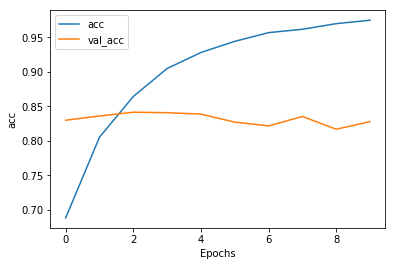

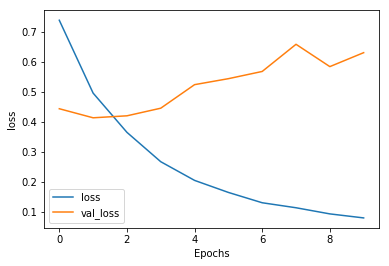

In [54]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "acc")
plot_graphs(history, "loss")